<a href="https://colab.research.google.com/github/SJcodeML/python-all-topics-/blob/main/Agentic_AI_Traditional_Python_Lesson_13_OOP_Objects_%26_Classes_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#a9a56c" size=2> **@Author: Arif Kasim Rozani - (Team Operation Badar)** </font>



# **11. Class and Static Variables**

Class and static variables are used to store data that is related to the class itself, rather than to instances of the class. They offer a way to share data and behavior across all instances.

## **Difference between Class and Static Variables**

While the terms are often used **`interchangeably`** in Python, class variables are the preferred terminology. These variables are defined within the class but outside of any method.

  * **Class variables:** These are associated with the class itself and are shared among all instances of the class. They are defined within the class but outside of any method.

  * **Instance variables:** These are unique to each object or instance of the class.


## **Accessing and Modifying Class Variables**

Class variables can be accessed and modified using the class name or an instance of the class.

  * **Accessing**: Class variables are accessed using the class name directly (e.g., ClassName.variable_name) or through an instance of the class (e.g., instance_name.variable_name).

  * **Modifying**: When modifying a class variable through an instance, you are actually creating a new instance variable that shadows the class variable for that particular instance. To modify the class variable itself, you should use the class name.


## **Example: Working with Class and Static Variables**

In [ ]:
class Bakery:
    type = "cake"  # Class variable

    def __init__(self, flavor, price):
        self.flavor = flavor  # Instance variable
        self.price = price    # Instance variable

    def update_cake_count(cls, count):
        cls.cake_count = count

#Accessing
print(Bakery.type)

cake1 = Bakery("Chocolate", 25.00)
cake2 = Bakery("Vanilla", 22.00)

print(cake1.flavor)
print(cake2.price)

#Modifying
Bakery.type = "pastry"
print(cake1.type)

cake1.type = "cookie"
print(cake1.type)
print(cake2.type)


cake
Chocolate
22.0
pastry
cookie
pastry


## **Key Differences Summarized**


| Feature      | Class Variable                                            | Instance Variable                          |   |
|--------------|-----------------------------------------------------------|--------------------------------------------|---|
| Scope        | Shared by all instances of the class                      | Unique to each instance of the class       |   |
| Creation     | Created when the class is defined                         | Created when an object is instantiated     |   |
| Access       | Accessed using the class name or instance name            | Accessed through an instance of the class  |   |
| Modification | Modified using the class name                             | Modified through a specific instance       |   |
| Use Cases    | Maintain values common to all instances, track statistics | Store object-specific data                 

Understanding the distinction between class and instance variables is crucial for effective object-oriented programming in Python. Class variables provide a way to share data and behavior across all instances of a class, while instance variables allow each object to have its own unique state.

# **12. Composition and Aggregation**

Composition and aggregation are both ways to relate classes in object-oriented programming, focusing on how objects contain or interact with each other.

## **What is Composition?** (*Strong Relationship*)

Composition is a **"has-a"** relationship where one object contains another, and the contained object's lifecycle is dependent on the container object.**If the container object is destroyed, the contained object is also destroyed**. **It's a strong relationship, like a car and its engine; the car cannot function without the engine, and the engine is intrinsically part of the car.** Composition involves building complex objects by combining simpler ones.


## **What is Aggregation?** (*Weak Relationship*)

**Aggregation is also a "has-a" relationship, but it represents a weaker association than composition.** **In aggregation, the contained object can exist independently of the container object. It's like a university and its departments; the university contains departments, but the departments can exist even if the university ceases to exist.**


## **Difference Between Composition and Inheritance**

Composition and inheritance are both mechanisms for code reuse in OOP, but they differ significantly:

  * **Relationship**: Composition is a "has-a" relationship, while inheritance is an "is-a" relationship.

  * **Flexibility**: Composition offers more flexibility than inheritance. You can easily change or replace components without affecting the entire system.
  * **Coupling**: Composition reduces coupling between classes, making the code easier to maintain and understand. Inheritance can lead to tight coupling, code duplication, and other problems.
  * **Reuse**: Composition reuses code by combining objects, while inheritance reuses code by inheriting properties and methods from parent classes.


Composition allows for independent modification and replacement of components, promoting cleaner code design. Inheritance has its place, but composition should be preferred.

## **Example: Implementing Composition and Aggregation**

In [ ]:
# Composition
class Engine:
    def start(self):
        return "Engine starting"

class Car:
    def __init__(self):
        self.engine = Engine()  # Composition: Car *has-a* Engine, and owns it

    def start(self):
        return f"Car starting: {self.engine.start()}"

# Aggregation
class Department:
    def __init__(self, name):
        self.name = name

class University:
    def __init__(self, name):
        self.name = name
        self.departments = []  # University *has-a* Department, but doesn't own it

    def add_department(self, department):
        self.departments.append(department)


In this example:

  * Car and Engine demonstrate composition. The Car class creates and owns an instance of the Engine class. If the Car object is destroyed, the Engine object is also destroyed.

  * University and Department demonstrate aggregation. The University class contains a list of Department objects, but the Department objects can exist independently of the University object. The university does not exclusively own the Department.

# **13. Method Resolution Order (MRO)**

**Method Resolution Order (MRO)** is the order in which Python searches for methods and attributes in a class hierarchy, especially in cases of multiple inheritance. It ensures that the correct method or attribute is found and called when there are overlapping names in the inheritance tree.

## **The mro() Method**

The mro() method is a built-in method in Python that returns a list of classes in the order they will be searched for attributes and methods. This list represents the **linearization** of the class hierarchy.

## **How Python Resolves Method Calls in Multiple Inheritance**

Python uses the **C3 Linearization algorithm** to determine the MRO. This algorithm ensures that:

  1.  Subclasses come before their parent classes.
  2.  The order of inheritance is preserved.
  3.  No class is visited more than once.

## **Example: Understanding MRO in Python**

Let’s create a class hierarchy with multiple inheritance to demonstrate how MRO works.

In [ ]:
# Define the classes
class A:
    def greet(self):
        return "Hello from A"

class B(A):
    def greet(self):
        return "Hello from B"

class C(A):
    def greet(self):
        return "Hello from C"

class D(B, C):
    pass

# Create an instance of D
d = D()

# Check the MRO of class D
print(D.mro())  # Output: [<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]

# Call the greet method
print(d.greet())  # Output: Hello from B

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
Hello from B


## **Explanation of the Code**

  1.  **Class Hierarchy:**

    * A is the parent class of both B and C.
    * D inherits from both B and C.



2.  **MRO of Class D:**
      The mro() method returns the order in which Python will search for methods and attributes in class D:
      [D, B, C, A, object]

3.  **Method Call Resolution:**
  When d.greet() is called, Python searches for the greet method in the following order:
    * First in D: Not found.
    * Then in B: Found! The greet method of B is called, and the search stops.

## **Visualizing MRO**

The MRO for class D can be visualized as a linear sequence:
D → B → C → A → object

## **Example with Diamond Inheritance**

Let’s create a more complex example with diamond inheritance to further illustrate MRO.

In [ ]:
# Define the classes
class X:
    def greet(self):
        return "Hello from X"

class Y(X):
    def greet(self):
        return "Hello from Y"

class Z(X):
    def greet(self):
        return "Hello from Z"

class W(Y, Z):
    pass

# Create an instance of W
w = W()

# Check the MRO of class W
print(W.mro())  # Output: [<class '__main__.W'>, <class '__main__.Y'>, <class '__main__.Z'>, <class '__main__.X'>, <class 'object'>]

# Call the greet method
print(w.greet())  # Output: Hello from Y

[<class '__main__.W'>, <class '__main__.Y'>, <class '__main__.Z'>, <class '__main__.X'>, <class 'object'>]
Hello from Y


## **Explanation of the Code**

1.  Class Hierarchy:
    * X is the parent class of both Y and Z.
    * W inherits from both Y and Z.

2.  MRO of Class W:

    The mro() method returns the order in which Python will search for methods and attributes in class W:
    [W, Y, Z, X, object]
Method Call Resolution:
When w.greet() is called, Python searches for the greet method in the following order:

    * First in W: Not found.
    * Then in Y: Found! The greet method of Y is called, and the search stops.

## **Key Takeaways**

  * **Method Resolution Order (MRO)** is the order in which Python searches for methods and attributes in a class hierarchy.

  * The mro() method returns the linearization of the class hierarchy.
Python uses the **C3 Linearization algorithm** to determine the MRO, ensuring consistency and avoiding conflicts in multiple inheritance.

  * Understanding MRO is crucial for debugging and designing complex class hierarchies.

This example demonstrates how MRO works in Python, especially in cases of multiple inheritance. 🚀


---



[The Veiled Virgin](https://en.wikipedia.org/wiki/The_Veiled_Virgin)

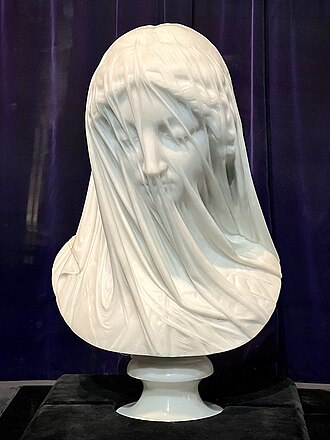

<font color=orange>The Veiled Virgin looks like it’s wearing a soft veil, but it’s all carved from one solid rock—just like a decorator adds something extra to a function without changing it. The function stays the same underneath, but the decorator adds a special effect. It’s like dressing up your code without touching its heart.</font>








# **14. Decorators in Classes**

Decorators in Python are a powerful feature that allows you to modify or extend the behavior of functions or methods. When applied to classes, decorators can enhance or alter the behavior of the class or its methods. Additionally, Python provides specific property decorators (@property, @setter, and @deleter) to manage attribute access in a controlled way.

## **Class Decorators**

A **class decorator** is a function that takes a class as input and returns a modified or extended version of the class. It’s often used to add functionality, enforce constraints, or modify class behavior.

## **Property Decorators**

The **@property decorator** is used to define a method as a **getter** for a class attribute. It allows you to access the attribute like a property rather than a method. You can also define setter and **deleter** methods using the @setter and @deleter decorators, respectively.

## **Example: Using Decorators in Classes**

Let’s create examples to demonstrate class decorators and property decorators.

In [ ]:
class CountCalls:
    def __init__(self, func):
        self.func = func
        self.call_count = 0

    def __call__(self, *args, **kwargs):
        self.call_count += 1
        print(f"Decorator: Call {self.call_count} of {self.func.__name__}")
        return self.func(*args, **kwargs)

@CountCalls
def say_hello(name):
    print(f"Hello, {name}!")

say_hello("Alice")
say_hello("Bob")


Decorator: Call 1 of say_hello
Hello, Alice!
Decorator: Call 2 of say_hello
Hello, Bob!


In this example, `CountCalls` is a class decorator that counts the number of times a function is called. The `@CountCalls` syntax above the say_hello function applies the CountCalls decorator to it. Each time say_hello is called, the \_\_call\_\_ method of CountCalls is executed, incrementing the call_count and printing a message.

In [ ]:
# Define a class decorator
def add_greeting(cls):
    def greet(self):
        return f"Decorator: Hello from {self.__class__.__name__} | ", self.name
    cls.greet = greet
    return cls

# Apply the decorator to a class
@add_greeting
class Person:
    def __init__(self, name):
        self.name = name

# Create an instance of the decorated class
person = Person("Alice")
print(person.greet())  # Output: Hello from Person

('Decorator: Hello from Person | ', 'Alice')


## **Property Decorator Example**

The `@property` decorator lets you **control** how an attribute is **accessed, set, or deleted** in a class.  
It allows you to **add logic** (like validation or calculations) while still making it look like a simple attribute.

----------

### **1️⃣ Basic Getter (Read-Only Property)**

-   **Turns a method into a "getter"** (like reading an attribute).
-   **No parentheses needed!**

#### **Example: Get a value**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name  # Internal variable (convention: `_name`)

    @property
    def name(self):
        """Getter for name"""
        return self._name

# Usage
p = Person("Alice")
print(p.name)  # Like an attribute (no parentheses!)

Alice



➡️ `name` acts like an attribute, but it's a method!

----------

### **2️⃣ Setter (Change a Value with Validation)**

-   **`@prop_name.setter`** lets you **modify** the attribute.
-   **Add checks before setting!**

#### **Example: Set with validation**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, new_name):
        if not isinstance(new_name, str):
            raise ValueError("Name must be a string!")
        self._name = new_name

# Usage
p = Person("Bob")
p.name = "Charlie"  # Works
print(p.name)  # Output: Charlie

#p.name = 123  # ❌ Error! (ValueError: Name must be a string!) # uncomment to see error

Charlie



### **3️⃣ Deleter (Remove an Attribute)**

-   **`@prop_name.deleter`** runs when you `del obj.prop`.
-   **Used for cleanup.**

#### **Example: Delete safely**

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    @name.deleter
    def name(self):
        print("Deleting name!")
        del self._name

# Usage
p = Person("Dave")
print(p.name)  # Output: Dave

del p.name  # Runs deleter
#print(p.name)  # ❌ Error! (AttributeError: 'Person' has no attribute '_name') # uncomment to see error

Dave
Deleting name!



### **4️⃣ Computed Property (Dynamic Value)**

-   **Calculate a value on the fly!**

#### **Example: Get BMI from height & weight**

In [ ]:
class Person:
    def __init__(self, weight_kg, height_m):
        self.weight = weight_kg
        self.height = height_m

    @property
    def bmi(self):
        """Body Mass Index (weight / height²)"""
        return self.weight / (self.height ** 2)

# Usage
p = Person(70, 1.75)  # 70kg, 1.75m
print(p.bmi)  # Output: 22.857...

22.857142857142858


➡️ **No `bmi.setter` → You can't change `bmi` directly!**

----------

### **🔥 Summary Table**

| Task           | Syntax                            | Example      |   |
|----------------|-----------------------------------|--------------|---|
| Get a value    | @property def x(self):            | print(obj.x) |   |
| Set a value    | @x.setter def x(self, value):     | obj.x = 10   |   |
| Delete a value | @x.deleter def x(self):           | del obj.x    |   |
| Computed value | @property def y(self): return ... | print(obj.y) |   |


----------

### **✅ When to Use `@property`**

✔ **Add validation** (e.g., check if age ≥ 0).  
✔ **Make read-only attributes** (like `bmi`).  
✔ **Hide internal variables** (use `_name` instead of `name`).  
✔ **Change how attributes work without breaking existing code.**

----------

### **Final Example (Temperature Converter 🌡️)**

In [ ]:
class Temperature:
    def __init__(self, celsius):
        self._celsius = celsius

    @property
    def celsius(self):
        return self._celsius

    @property
    def fahrenheit(self):
        return (self._celsius * 9/5) + 32

    @fahrenheit.setter
    def fahrenheit(self, value):
        self._celsius = (value - 32) * 5/9

# Usage
temp = Temperature(0)  # 0°C
print(temp.fahrenheit)  # 32°F

32.0


In [ ]:
temp.fahrenheit = 100  # Set in °F → auto-converts to °C
print(temp.celsius)    # 37.777...°C
print(temp.fahrenheit)

37.77777777777778
100.0



➡️ **Smooth conversion between Celsius & Fahrenheit!**

----------

## **🎯 Key Takeaway**

`@property` makes your code **cleaner & safer** by letting you control attribute access **without changing how users interact with your class!** 🚀



  * Python decorators are a **design pattern** that allows you to modify the functionality of a function by **wrapping** it in another function.

  * **Class decorators** modify or extend the behavior of a class.
  
  * A decorator is a callable that returns a callable.

    1.  **Callable:** In Python, "callable" refers to something that can be called like a function, using parentheses (). This includes functions themselves, but also objects that have a \_\_call__() method defined4.

    2.  **Decorator Takes a Callable:** A decorator's primary job is to accept a function (or another callable) as an argument. This is the function it will modify or enhance.

    3.  **Decorator Returns a Callable:** After processing the input callable (usually by wrapping it with some added functionality), the decorator must return another callable. This is usually a modified version of the original function.

  * Decorators seem better suited to modify the functionality of an entire object (including function objects) versus the functionality of an object method which in general will depend on instance attributes.

  * **Property decorators** (@property, @setter, @deleter) allow you to manage attribute access in a controlled way.
  * The @property decorator defines a getter method for an attribute.
  * The @setter decorator defines a setter method for an attribute.
  * The @deleter decorator defines a deleter method for an attribute.


**In essence, decorators are a way to modify or extend the behavior of functions or methods without changing their actual code. They achieve this by wrapping the original function within another function (the decorator).**

This example demonstrates how to use decorators in Python classes effectively. 🚀

## **What is Callable**

In Python, a `callable` is an object that can be called like a function. In other words, it's an object that can be invoked with parentheses `()` to execute some code.

**Examples of callables:**

1. **Functions**: These are the most obvious examples of callables. You can define a function using the `def` keyword and call it by its name followed by parentheses.

2. **Lambda functions**: These are small, anonymous functions that can be defined inline.
3. **Classes**: Yes, you can call a class like a function! When you do, it creates a new instance of the class.
4. **Methods**: These are functions that are part of a class.
5. **Instances of classes that implement `__call__`**: If a class defines a special method called `__call__`, instances of that class become callable.

**What makes an object callable?**

An object is callable if it has a `__call__` method. This method is a special method that's invoked when you call the object like a function.

**Example:**

In [ ]:
class MyClass:
    def __call__(self):
        print("I'm callable!")

obj = MyClass()
obj()  # Output: I'm callable!

I'm callable!


In this example, `MyClass` defines a `__call__` method, so instances of `MyClass` become callable.

**Checking if an object is callable**

You can use the `callable()` function to check if an object is callable:

In [ ]:
def my_function():
    pass

print(callable(my_function))  # Output: True

class MyClass:
    def __call__(self):
        pass

obj = MyClass()
print(callable(obj))  # Output: True

print(callable("hello"))  # Output: False

True
True
False


In this example, we define a function `my_function` and a class `MyClass` with a `__call__` method. We then create an instance of `MyClass` and check if each object is callable using `callable()`. The string "hello" is not callable, so `callable("hello")` returns `False`.

**Use cases for callables**

Callables have many use cases, such as:

* Creating higher-order functions that take other functions as arguments

* Implementing callbacks or event handlers
* Creating factories or constructors that return instances of classes
* Creating domain-specific languages (DSLs) or mini-languages

I hope this helps! Let me know if you have any questions or need further clarification.

# **15. Working with Modules and Packages in OOP**

Organizing your code into **modules** and **packages** is essential for maintaining clean, scalable, and maintainable code, especially in large projects. In Python, a **module** is a single file containing Python code (e.g., classes, functions, variables), and a **package** is a directory containing multiple modules and an \_\_init__.py file.

## **Organizing Classes in Modules**

To organize your classes effectively:

  1.  Group related classes into a single module.
  
  2.  Use meaningful names for modules and classes.
  3.  Avoid putting all classes in a single module (unless the project is very small)

## **Importing Classes from Modules**

To use classes from one module in another:

  1.  Use the import statement to import the entire module.

  2.  Use from module import ClassName to import specific classes.
  3.  Use from module import `*` to import all classes (not recommended for large projects).

## **Example: Structuring a Python Project Using OOP** (use VS Code / Cursor)

Let’s create a simple project to demonstrate how to organize classes into modules and import them.

## **Directory Structure**


```
my_project/
│
├── animals/
│   ├── __init__.py
│   ├── mammals.py
│   └── birds.py
│
├── vehicles/
│   ├── __init__.py
│   ├── cars.py
│   └── bikes.py
│
└── main.py
```

## **Code for Each Module** (use Visual Studio Code / Cursor)

  1.  **animals/mammals.py:**
python

In [ ]:
class Dog:
    def speak(self):
        return "Woof!"

class Cat:
    def speak(self):
        return "Meow!"

## 2.  **animals/birds.py:**

In [ ]:
class Parrot:
    def speak(self):
        return "Squawk!"

class Sparrow:
    def speak(self):
        return "Chirp!"

## **3.  vehicles/cars.py:**

In [ ]:
class Car:
    def __init__(self, model):
        self.model = model

    def display(self):
        return f"Car: {self.model}"

## **4. vehicles/bikes.py:**

In [ ]:
class Bike:
    def __init__(self, brand):
        self.brand = brand

    def display(self):
        return f"Bike: {self.brand}"

## **5.  animals/__init__.py:**

In [ ]:
from .mammals import Dog, Cat
from .birds import Parrot, Sparrow

## **6.  vehicles/__init__.py:**

In [ ]:
from .cars import Car
from .bikes import Bike

## **Code for main.py**

In [ ]:
from animals import Dog, Cat, Parrot, Sparrow
from vehicles import Car, Bike

# Create instances of animal classes
dog = Dog()
cat = Cat()
parrot = Parrot()
sparrow = Sparrow()

# Call methods from animal classes
print(dog.speak())  # Output: Woof!
print(cat.speak())  # Output: Meow!
print(parrot.speak())  # Output: Squawk!
print(sparrow.speak())  # Output: Chirp!

# Create instances of vehicle classes
car = Car("Toyota Corolla")
bike = Bike("Harley Davidson")

# Call methods from vehicle classes
print(car.display())  # Output: Car: Toyota Corolla
print(bike.display())  # Output: Bike: Harley Davidson

## **Explanation of the Code**

  1.  **Module Organization:**

  * Related classes are grouped into modules (mammals.py, birds.py, cars.py, bikes.py).

  * The __init__.py files in the animals and vehicles directories make them packages and allow importing classes directly from the package.

2.  **Importing Classes:**

  * In main.py, classes are imported from their respective modules using from animals import Dog, Cat, Parrot, Sparrow and from vehicles import Car, Bike.

  3.  **Using Classes:**
  * Instances of the classes are created, and their methods are called in main.py.

## **Output of the Code**

```
Woof!
Meow!
Squawk!
Chirp!
Car: Toyota Corolla
Bike: Harley Davidson
```

## **Key Takeaways**

  * **Modules** are used to organize related classes, functions, and variables into a single file.

  * **Packages** are directories containing multiple modules and an __init__.py file.
  * Use the import statement or from module import ClassName to import classes from modules.
  * Organizing your project into modules and packages improves readability, maintainability, and scalability.
  
This example demonstrates how to structure a Python project using OOP principles effectively. 🚀

# **16. Advanced OOP Concepts**

In this section, we’ll explore some advanced Object-Oriented Programming (OOP) concepts in Python, including **metaclasses**, **design patterns** (Singleton and Factory), and how to implement them.

## **1. Metaclasses**

A metaclass is the class of a class. It defines how a class behaves. In Python, the default metaclass is type. You can create custom metaclasses to control class creation and behavior.

## **2. Singleton Design Pattern**

The Singleton pattern ensures that a class has only one instance and provides a global point of access to it. This is useful when you need to manage shared resources, such as a database connection or configuration settings.

## **3. Factory Design Pattern**

The Factory pattern is a creational design pattern that provides an interface for creating objects in a superclass but allows subclasses to alter the type of objects that will be created. It promotes loose coupling and flexibility.

## **To know more about Design Pattern please visit:**

[The Catalog of Python Design Pattern Examples](https://refactoring.guru/design-patterns/python)

[Gang of Four design patterns in Python](https://github.com/tuvo1106/python_design_patterns)

[Gang of Four (GOF) Design Patterns](https://www.geeksforgeeks.org/gang-of-four-gof-design-patterns/)

## **Example: Implementing Advanced OOP Concepts in Python**

Let’s create examples to demonstrate metaclasses, the Singleton pattern, and the Factory pattern.

## **Metaclass Example**

In [ ]:
# Custom metaclass
class Meta(type):
    def __new__(cls, name, bases, dct):
        print(f"Creating class: {name}")
        return super().__new__(cls, name, bases, dct)

# Class using the custom metaclass
class MyClass(metaclass=Meta):
    pass

# Output: Creating class: MyClass

Creating class: MyClass


## **Singleton Design Pattern Example**

In [ ]:
class Singleton:
    _instance = None

    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
        return cls._instance

# Create instances of the Singleton class
singleton1 = Singleton()
singleton2 = Singleton()

# Check if both instances are the same
print(singleton1 is singleton2)  # Output: True
print(id(singleton1) == id(singleton2))  # Output: True

True
True


## **Factory Design Pattern Example**

In [ ]:
# Product interface
class Animal:
    def speak(self):
        pass

# Concrete products
class Dog(Animal):
    def speak(self):
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow!"

# Factory class
class AnimalFactory:
    @staticmethod
    def create_animal(animal_type):
        if animal_type == "dog":
            return Dog()
        elif animal_type == "cat":
            return Cat()
        else:
            raise ValueError("Invalid animal type")

# Use the factory to create animals
dog = AnimalFactory.create_animal("dog")
cat = AnimalFactory.create_animal("cat")

# Call the speak method
print(dog.speak())  # Output: Woof!
print(cat.speak())  # Output: Meow!

Woof!
Meow!


## **Explanation of the Code**

  1.  **Metaclass:**

    * The Meta metaclass overrides the __new__ method to print a message when a class is created.
    * The MyClass class uses Meta as its metaclass.

  2.  **Singleton Pattern:**

  * The Singleton class ensures that only one instance is created by overriding the __new__ method.
  * Multiple instances of Singleton refer to the same object.

  3.  **Factory Pattern:**

  * The Animal class defines the interface for all animal products.
  * The Dog and Cat classes are concrete implementations of Animal.
  * The AnimalFactory class provides a method (create_animal) to create instances of Dog or Cat based on the input.

## **Key Takeaways**

  * **Metaclasses** control the behavior of class creation. You can use them to customize how classes are created and initialized.

  * The **Singleton pattern** ensures that a class has only one instance and provides a global point of access to it.

  * The **Factory pattern** provides a way to create objects without specifying the exact class of the object that will be created.
  * These advanced OOP concepts are useful for managing complex systems and promoting code reusability and flexibility.

  
This example demonstrates how to implement advanced OOP concepts in Python effectively. 🚀

# **17. Error Handling in OOP**

Error handling is a critical aspect of writing robust and reliable code. In Object-Oriented Programming (OOP), you can handle errors by raising exceptions in methods and creating custom exceptions to represent specific error conditions in your application.

## **Raising Exceptions in Methods**

In Python, you can raise exceptions using the raise keyword. This is useful for signaling that an error has occurred in a method.

## **Custom Exceptions in Classes**

Custom exceptions are user-defined exceptions that inherit from Python’s built-in Exception class. They allow you to define specific error types for your application.

## **Example: Handling Errors in OOP**

Let’s create a BankAccount class to demonstrate error handling in OOP. We’ll raise exceptions for invalid operations and define a custom exception for insufficient funds.

## **Code Example**

In [ ]:
# Custom exception for insufficient funds
class InsufficientFundsError(Exception):
    def __init__(self, balance, amount):
        super().__init__(f"Insufficient funds: balance is {balance}, but {amount} was requested.")
        self.balance = balance
        self.amount = amount

# BankAccount class
class BankAccount:
    def __init__(self, account_holder, balance=0):
        self.account_holder = account_holder
        self.balance = balance

    # Method to deposit money
    def deposit(self, amount):
        if amount <= 0:
            raise ValueError("Deposit amount must be positive.")
        self.balance += amount
        print(f"Deposited {amount}. New balance: {self.balance}")

    # Method to withdraw money
    def withdraw(self, amount):
        if amount <= 0:
            raise ValueError("Withdrawal amount must be positive.")
        if self.balance < amount:
            raise InsufficientFundsError(self.balance, amount)
        self.balance -= amount
        print(f"Withdrew {amount}. New balance: {self.balance}")

    # Method to display account details
    def display(self):
        print(f"Account Holder: {self.account_holder}, Balance: {self.balance}")

# Create a BankAccount instance
account = BankAccount("Alice", 1000)

# Deposit money
try:
    account.deposit(500)  # Output: Deposited 500. New balance: 1500
except ValueError as e:
    print(e)

# Withdraw money
try:
    account.withdraw(2000)  # Raises InsufficientFundsError
except InsufficientFundsError as e:
    print(e)  # Output: Insufficient funds: balance is 1500, but 2000 was requested.
except ValueError as e:
    print(e)

# Display account details
account.display()  # Output: Account Holder: Alice, Balance: 1500

Deposited 500. New balance: 1500
Insufficient funds: balance is 1500, but 2000 was requested.
Account Holder: Alice, Balance: 1500


## **Explanation of the Code**

1.  **Custom Exception (InsufficientFundsError):**

    * Inherits from Python’s Exception class.

    * Includes a custom error message that displays the account balance and the requested withdrawal amount.

2.  **BankAccount Class:**

    * deposit method: Raises a ValueError if the deposit amount is not positive.

    * withdraw method: Raises a ValueError if the withdrawal amount is not positive and raises InsufficientFundsError if the balance is insufficient.
    * display method: Prints the account holder’s name and balance.

3.  **Error Handling:**

    * The try and except blocks are used to catch and handle exceptions raised by the deposit and withdraw methods.

## **Key Takeaways**

  * **Raising exceptions** is a way to signal errors in methods.
  * **Custom exceptions** allow you to define specific error types for your application.
  * Use try and except blocks to handle exceptions gracefully.
  * Error handling in OOP ensures that your program can recover from unexpected situations and provide meaningful feedback to users.

  
This example demonstrates how to handle errors in Python OOP effectively. 🚀

# **18. Testing OOP Code**

Testing is a critical part of software development, especially when working with Object-Oriented Programming (OOP). It ensures that your classes and methods behave as expected. Python provides libraries like unittest and pytest for writing and running tests.

## **Unit Testing Classes and Methods**

**Unit testing** involves testing individual components (e.g., classes and methods) in isolation to ensure they work correctly.

## **Using unittest or pytest**

  * **unittest:** Python’s built-in testing framework, inspired by Java’s JUnit.
  * **pytest:** A popular third-party testing framework that is more flexible and easier to use than unittest.

## **Example: Writing Test Cases for OOP Code**

Let’s create a simple Calculator class and write unit tests for it using both unittest and pytest.

## **Calculator Class**

In [ ]:
class Calculator:
    def add(self, a, b):
        return a + b

    def subtract(self, a, b):
        return a - b

    def multiply(self, a, b):
        return a * b

    def divide(self, a, b):
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b

## **Testing with unittest**

In [ ]:
import unittest
#from calculator import Calculator

class TestCalculator(unittest.TestCase):
    def setUp(self):
        self.calc = Calculator()

    def test_add(self):
        self.assertEqual(self.calc.add(2, 3), 5)

    def test_subtract(self):
        self.assertEqual(self.calc.subtract(5, 3), 2)

    def test_multiply(self):
        self.assertEqual(self.calc.multiply(2, 3), 6)

    def test_divide(self):
        self.assertEqual(self.calc.divide(6, 3), 2)

    def test_divide_by_zero(self):
        with self.assertRaises(ValueError):
            self.calc.divide(6, 0)

# Replace unittest.main() with the following to run tests in IPython:
# if __name__ == "__main__":
#     unittest.main()
# Instead, use:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


## **Testing with pytest**

In [ ]:
import pytest
#from calculator import Calculator

@pytest.fixture
def calc():
    return Calculator()

def test_add(calc):
    assert calc.add(2, 3) == 5

def test_subtract(calc):
    assert calc.subtract(5, 3) == 2

def test_multiply(calc):
    assert calc.multiply(2, 3) == 6

def test_divide(calc):
    assert calc.divide(6, 3) == 2

def test_divide_by_zero(calc):
    with pytest.raises(ValueError):
        calc.divide(6, 0)


#calc1 = calc()

#test_add()
# test_subtract(calc)
# test_multiply(calc)
# test_divide(calc)
# test_divide_by_zero(calc)


# Instead of directly calling test_add(), run tests using pytest
# This will ensure that the fixture is used to provide the 'calc' argument
if __name__ == '__main__':
    pytest.main(['-v']) # Remove arguments to let pytest discover tests automatically

======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: typeguard-4.4.1, anyio-3.7.1, langsmith-0.3.5
collecting ... collected 0 items

====================================== no tests ran in 0.01s =======================================


In [ ]:
!pytest -v

======================================= test session starts ========================================
platform linux -- Python 3.11.11, pytest-8.3.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: typeguard-4.4.1, anyio-3.7.1, langsmith-0.3.5
collected 0 items                                                                                  

====================================== no tests ran in 0.01s =======================================


## **Explanation of the Code**

1.  **Calculator Class:**
    * Implements basic arithmetic operations (add, subtract, multiply, divide).

    * Raises a ValueError if division by zero is attempted.

2.  **Testing with unittest:**

    * The TestCalculator class inherits from unittest.TestCase.

    * The setUp method initializes a Calculator instance for each test.
    * Test methods use assertEqual to check if the actual output matches the expected output.
    * The assertRaises method is used to test for exceptions.

3.  Testing with pytest:

    * The @pytest.fixture decorator is used to create a Calculator instance for each test.

    * Test functions use the assert keyword to check if the actual output matches the expected output.
    * The pytest.raises context manager is used to test for exceptions.

## **Running the Tests**

**Using unittest**

Save the unittest code in a file (e.g., test_calculator_unittest.py) and run it:

```  
python -m unittest test_calculator_unittest.py
```

**Using pytest**

Save the pytest code in a file (e.g., test_calculator_pytest.py) and run it:

```
pytest test_calculator_pytest.py
```

## **Output of the Tests**

Both unittest and pytest will display the results of the tests, indicating which tests passed or failed.

## **Key Takeaways**

  * **Unit testing** ensures that individual components (classes and methods) work as expected.
  * **unittest** is Python’s built-in testing framework, while pytest is a more flexible third-party framework.
  * Use assertions to check if the actual output matches the expected output.
  * Test for exceptions using assertRaises (in unittest) or pytest.raises (in pytest).

  
This example demonstrates how to write and run unit tests for OOP code in Python effectively. 🚀

# **19. Best Practices in OOP**

Writing clean and maintainable Object-Oriented Programming (OOP) code is essential for building scalable and robust applications. Following best practices like the **SOLID** **principles** can help you achieve this. Let’s explore these principles and how to apply them in Python.

## **SOLID Principles in Python**

The **SOLID principles** are a set of five design principles that help developers write maintainable and scalable code. They are:

1.  **Single Responsibility Principle (SRP):**

    A class should have only one reason to change, meaning it should have only one responsibility.

2.  **Open/Closed Principle (OCP):**

    A class should be open for extension but closed for modification. You should be able to add new functionality without changing existing code.

3.  **Liskov Substitution Principle (LSP):**

    Objects of a superclass should be replaceable with objects of a subclass without affecting the correctness of the program.

4.  **Interface Segregation Principle (ISP):**

    Clients should not be forced to depend on interfaces they do not use. Instead of one large interface, create smaller, specific ones.

5.  **Dependency Inversion Principle (DIP):**

    High-level modules should not depend on low-level modules. Both should depend on abstractions. Abstractions should not depend on details. Details should depend on abstractions.

## **Example: Applying SOLID Principles**

Let’s create a Python example to demonstrate how to apply these principles.

## **Single Responsibility Principle (SRP)**

In [ ]:
# Bad: One class with multiple responsibilities
class Report:
    def generate_report(self, data):
        # Generate report
        pass

    def save_report(self, file_path):
        # Save report to file
        pass

# Good: Separate responsibilities into different classes
class ReportGenerator:
    def generate_report(self, data):
        # Generate report
        pass

class ReportSaver:
    def save_report(self, report, file_path):
        # Save report to file
        pass

## **Open/Closed Principle (OCP)**

In [ ]:
# Bad: Modify existing code to add new functionality
class AreaCalculator:
    def calculate_area(self, shape):
        if shape.type == "circle":
            return 3.14 * shape.radius ** 2
        elif shape.type == "rectangle":
            return shape.length * shape.width

# Good: Extend functionality without modifying existing code
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius ** 2

class Rectangle(Shape):
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

class AreaCalculator:
    def calculate_area(self, shape):
        return shape.area()

## **Liskov Substitution Principle (LSP)**

In [ ]:
# Bad: Subclass changes the behavior of the parent class
class Bird:
    def fly(self):
        pass

class Ostrich(Bird):
    def fly(self):
        raise NotImplementedError("Ostriches can't fly")

# Good: Subclass adheres to the behavior of the parent class
class Bird:
    def move(self):
        pass

class Sparrow(Bird):
    def move(self):
        print("Flying")

class Ostrich(Bird):
    def move(self):
        print("Running")

## **Interface Segregation Principle (ISP)**

In [ ]:
# Bad: One large interface
class Printer:
    def print_document(self):
        pass

    def scan_document(self):
        pass

    def fax_document(self):
        pass

# Good: Smaller, specific interfaces
class Printer:
    def print_document(self):
        pass

class Scanner:
    def scan_document(self):
        pass

class FaxMachine:
    def fax_document(self):
        pass

## **Dependency Inversion Principle (DIP)**

``` python
# Bad: High-level module depends on low-level module
class LightBulb:
    def turn_on(self):
        pass

    def turn_off(self):
        pass

class Switch:
    def __init__(self):
        self.bulb = LightBulb()

    def operate(self):
        if condition:
            self.bulb.turn_on()
        else:
            self.bulb.turn_off()

# Good: Both depend on abstractions
from abc import ABC, abstractmethod

class Switchable(ABC):
    @abstractmethod
    def turn_on(self):
        pass

    @abstractmethod
    def turn_off(self):
        pass

class LightBulb(Switchable):
    def turn_on(self):
        pass

    def turn_off(self):
        pass

class Switch:
    def __init__(self, device: Switchable):
        self.device = device

    def operate(self):
        if condition:
            self.device.turn_on()
        else:
            self.device.turn_off()
```

## **Key Takeaways**

  * **Single Responsibility Principle (SRP):** Each class should have only one responsibility.

  * **Open/Closed Principle (OCP):** Classes should be open for extension but closed for modification.

  * **Liskov Substitution Principle (LSP):** Subclasses should be substitutable for their superclasses.

  * **Interface Segregation Principle (ISP):** Use smaller, specific interfaces instead of one large interface.
  * **Dependency Inversion Principle (DIP):** High-level and low-level modules should depend on abstractions.


By applying these **SOLID principles**, you can write clean, maintainable, and scalable OOP code in Python. 🚀

**Further resources:**

[SOLID principles: realpython.com](https://realpython.com/solid-principles-python/)

[SOLID principles: github.io](https://yakhyo.github.io/solid-python/)

# **20. Iterable**

In Python, Iterable is not a parent class but rather an abstract base class (ABC) defined in the collections.abc module. It serves as a protocol or interface that other classes can implement to indicate that they are iterable (i.e., they can be looped over using a for loop or other iteration constructs).

## **What is an Iterable?**

An iterable is any object that can return an iterator when the iter() function is called on it. The iterator is used to traverse through the elements of the iterable.

## **Parent Class Relationship**

The Iterable abstract base class is not a parent class in the traditional sense (like inheritance in object-oriented programming). Instead, it is used to define a protocol that other classes can adhere to by implementing the __iter__() method.


## **Example of Iterable Classes**

Many built-in Python classes are iterable because they implement the __iter__() method. These include:

1.  **Lists**: list
2.  **Tuples**: tuple
3.  **Strings**: str
4.  **Dictionaries**: dict
5.  **Sets**: set
6.  **Ranges**: range
7.  **Generators**: generator

<br>

## **How to Check if a Class is Iterable**

You can use the isinstance() function with collections.abc.Iterable to check if an object is iterable:

In [ ]:
from collections.abc import Iterable

# Check if built-in types are iterable
print("isinstance([1, 2, 3], Iterable) = ",isinstance([1, 2, 3], Iterable))  # True (list is iterable)
print('isinstance("hello", Iterable)   = ', isinstance("hello", Iterable))    # True (string is iterable)
print("isinstance(123, Iterable)       = ", isinstance(123, Iterable))        # False (integer is not iterable)

isinstance([1, 2, 3], Iterable) =  True
isinstance("hello", Iterable)   =  True
isinstance(123, Iterable)       =  False


## **How to Make a Custom Class Iterable**

To make a custom class iterable, you need to implement the __iter__() method, which should return an iterator object. The iterator object must implement the __next__() method.

## **Example:**

In [ ]:
from collections.abc import Iterable, Iterator

class MyIterable(Iterable):
    def __init__(self, data):
        self.data = data

    def __iter__(self):
        return MyIterator(self.data)

class MyIterator(Iterator):
    def __init__(self, data):
        self.data = data
        self.index = 0

    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        value = self.data[self.index]
        self.index += 1
        print("Called: MyIterator.__next__")
        return value

# Usage
my_iterable = MyIterable([1, 2, 3])
for item in my_iterable:
    print("item : ",item)  # Output: 1, 2, 3

Called: MyIterator.__next__
item :  1
Called: MyIterator.__next__
item :  2
Called: MyIterator.__next__
item :  3


## **Key Points**

* Iterable is an abstract base class (ABC) from the collections.abc module.

* It defines a protocol for iterable objects by requiring the implementation of the __iter__() method.
* Many built-in Python classes (e.g., list, tuple, str, dict) are iterable because they implement this protocol.
* Custom classes can be made iterable by implementing the __iter__() method.

# **Object-Based Language vs. Object-Oriented Language**

## **Object-Based Language**

  * **Definition**: A language that supports objects (data structures with attributes and methods) and encapsulation (data hiding), but lacks key OOP features like inheritance and polymorphism.
  * **Features**:
    * Objects as instances with properties and methods.
    * Encapsulation (e.g., public/private access modifiers).
    * May include basic polymorphism (e.g., operator overloading).
  * Examples: JavaScript (prototype-based, but lacks classical inheritance), classic Visual Basic, Ada.

## **Object-Oriented Language**

  * **Definition**: A language that implements the four pillars of OOP:
    1.  **Encapsulation**: Hiding internal state and requiring interaction via methods.
    2.  **Inheritance**: Creating hierarchical relationships between classes (e.g., subclasses reusing parent class code).
    3.  **Polymorphism**: Allowing objects of different classes to respond to the same method (via inheritance or interfaces).
    4.  **Abstraction**: Simplifying complexity through abstract classes/interfaces.

  * Examples: Python, Java, C++, C#.

# **The Python's Object-Centric Nature**

# **Is Everything in Python an Object? YES!**

**Yes, in Python, absolutely everything is an object. This is a fundamental characteristic of the language and a core design principle.**

  * **Numbers**: Integers, floats, complex numbers are objects.
  * **Strings**: Textual data is represented as string objects.
  * **Lists**, Tuples, Dictionaries, Sets: These are built-in container types and are all objects.
  * **Functions**: Functions are first-class objects in Python. You can assign them to variables, pass them as arguments to other functions, and even return them from functions.
  * **Classes and Modules**: Classes themselves are objects (instances of metaclasses), and modules are also objects.
  * **Even None**: None, which represents the absence of a value, is an object of the NoneType class.
  * **Types/Classes**: In Python, types (like int, str, list) are also objects (they are instances of the metaclass type).


## **How to Verify:**

You can use the type() function in Python to check the type of any entity. It will always return a class (which is itself an object).

``` python
>>> type(5)
<class 'int'>
>>> type("hello")
<class 'str'>
>>> type([1, 2, 3])
<class 'list'>
>>> def my_function():
...     pass
>>> type(my_function)
<class 'function'>
>>> class MyClass:
...     pass
>>> obj = MyClass()
>>> type(MyClass)
<class 'type'>  # Classes are instances of 'type' (metaclass)
>>> type(obj)
<class '__main__.MyClass'>

```

## **Why is this important in Python?**

  * **Consistency**: It creates a consistent and unified way to work with data and code. Everything behaves like an object, leading to a more predictable programming model.
  
  * **Flexibility**: Because functions and classes are objects, Python is highly dynamic and allows for powerful meta-programming techniques. You can inspect, modify, and create objects dynamically at runtime.
  * **Object-Oriented Programming**: This "everything is an object" nature is foundational to Python's object-oriented features. It makes it natural to work with classes, inheritance, and polymorphism, as all entities are treated as objects.

## **In summary:**

  * Object-based languages provide objects and some basic object-related features but lack the full suite of OOP principles.

  * Object-oriented languages fully embrace OOP by incorporating classes, encapsulation, abstraction, inheritance, and polymorphism, leading to better software design and organization.
  * **Python is a fully object-oriented language where everything is an object**, contributing to its flexibility, consistency, and power.